# Analyze covariance function with window

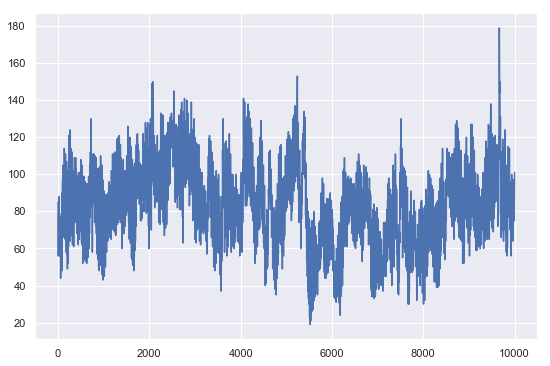

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (9, 6)})

df = pd.read_csv('data\\ssh.csv', engine="python")
variable = df['ssh'] 
df.head()
plt.plot(variable)

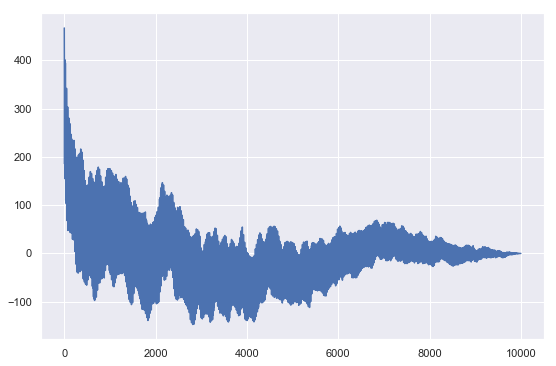

In [2]:
from statsmodels.tsa import stattools
plt.plot(stattools.acovf(variable,fft=False)) #autocovariance without window

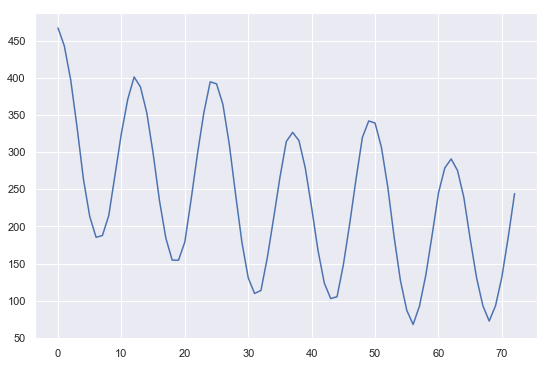

In [3]:
N=72
plt.plot(stattools.acovf(variable, nlag=N, fft=False)) #autocovariance upto N values

# Estimate spectral density function

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  


Text(0.5, 0, 'Sample')

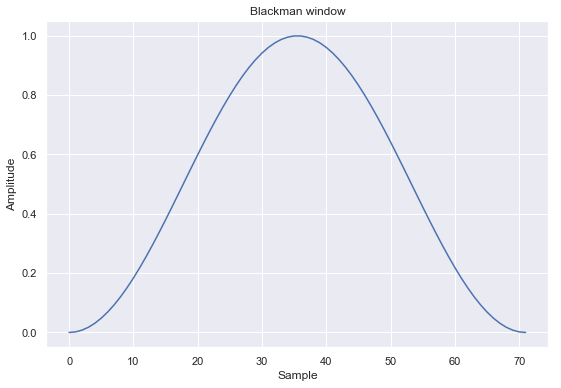

In [4]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


window_size = 72
blackman = signal.blackman(M=window_size)
bartlett = signal.hanning(M=window_size)

plt.plot(bartlett)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

10001


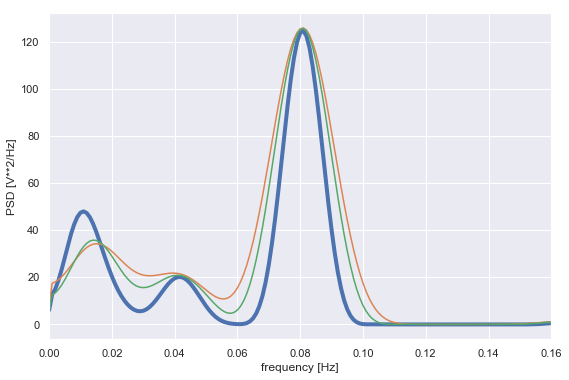

In [14]:
print(len(variable))
f, Pxx_den = signal.welch(variable, fs=1, scaling='spectrum', nfft = 1000, nperseg=100)
f_window, Pxx_den_window = signal.welch(variable, fs=1, window = blackman, nfft = 1000, scaling='spectrum')
f_window_bart, Pxx_den_window_bart = signal.welch(variable, fs=1, window = bartlett, nfft = 1000, scaling='spectrum')

plt.plot(f, Pxx_den, linewidth=4)
plt.plot(f_window, Pxx_den_window)
plt.plot(f_window_bart, Pxx_den_window_bart)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim((0,0.16))
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


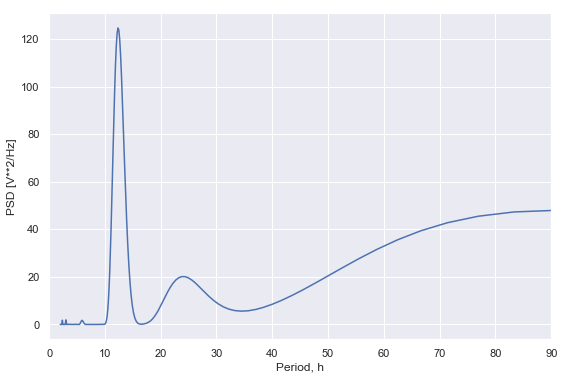

In [6]:
plt.plot(1/f, Pxx_den)
#plt.plot(1/f_window, Pxx_den_window)
plt.xlabel('Period, h')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim((0,90))
plt.show()

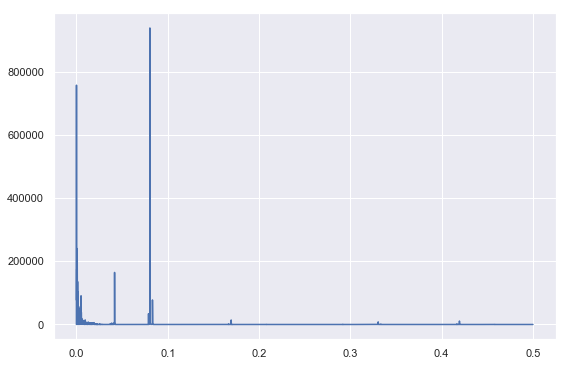

In [7]:
f, p = signal.periodogram(x=variable,fs=1,window=None)
plt.plot(f,p)

# Synthetic signal with noice

In [8]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [9]:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

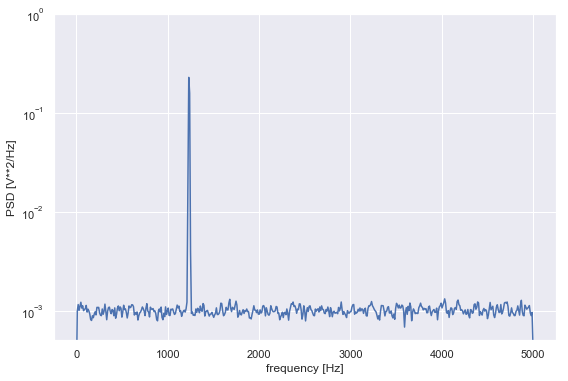

In [10]:
f, Pxx_den = signal.welch(x, fs, nperseg=1024, noverlap = 0) #If noverlap is 0, this method is equivalent to Bartlettâ€™s method
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# Spectral density for filtered data

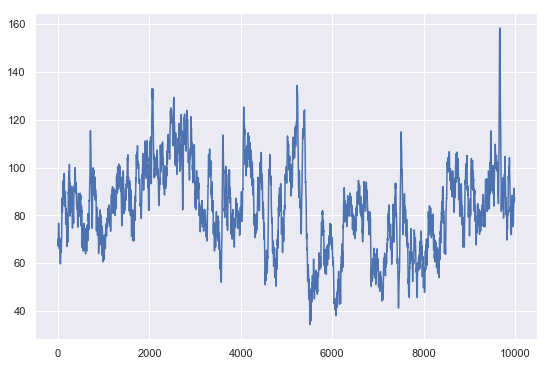

In [11]:
from quantecon import periodogram, ar_periodogram

variable_roll = df['ssh'].rolling(window=15).mean().iloc[15-1:].values

plt.plot(variable_roll)

10001


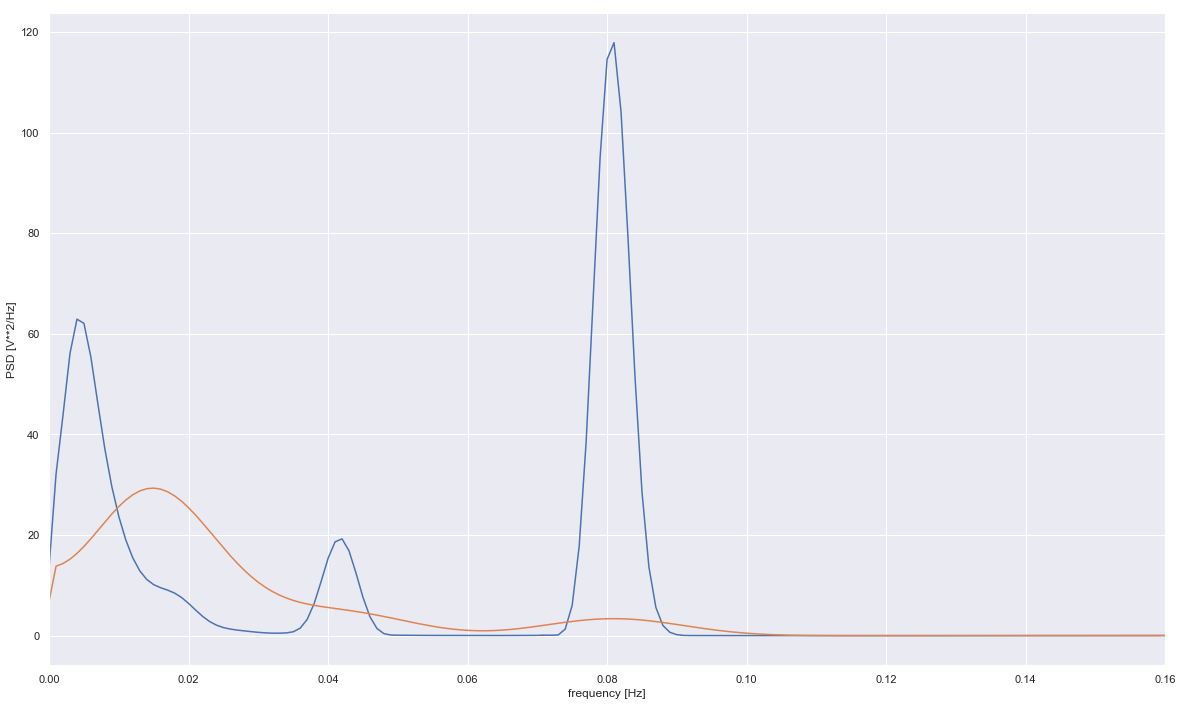

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))


print(len(variable))
f, Pxx_den = signal.welch(variable, fs=1, scaling='spectrum', nfft = 1000)
f_flt, Pxx_flt = signal.welch(variable_roll, fs=1, window = blackman, nfft = 1000, scaling='spectrum')

plt.plot(f, Pxx_den)
plt.plot(f_flt, Pxx_flt)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim((0,0.16))
#plt.xlim((0,90))
plt.show()

plt.show()